In [ ]:
#https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [ ]:
#'!gdown --id  1detGLQxIBNauJmDZ64bpcOFr-VhCIToc
#!unzip  cat-and-dog.zip

In [ ]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.1.0'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Chargement de l'ensemble de données

Le jeu de données que nous allons utiliser pour ce tutoriel est le jeu de données cat and dog, qui contient des images de chats et de chiens. Jetons un coup d'œil aux fichiers contenus dans le dossier dataset. Pour ce faire, je vais créer une fonction.

In [ ]:
import os
import glob
import random
import numpy as np
import seaborn as sns
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
image_path="cat-and-dog"
train_dir = "cat-and-dog/training_set/training_set"
test_dir = "cat-and-dog/test_set/test_set"
train_dir, test_dir

('cat-and-dog/training_set/training_set', 'cat-and-dog/test_set/test_set')

# Comprendre l'ensemble des données

It is important to understand the dataset for deep learning analysis because the dataset is the foundation of any machine learning or deep learning model. A deep learning model can only be as good as the data it is trained on, and a poor understanding of the dataset can lead to poor model performance or even bias. Now let's take a look at an image in the dataset.

Random image path: cat-and-dog\test_set\test_set\dogs\dog.4805.jpg
Image class: dogs
Image height: 499
Image width: 375


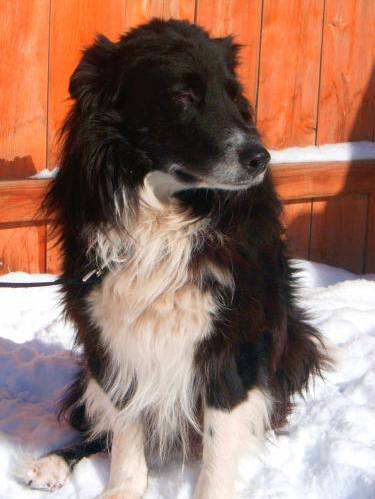

In [ ]:


# Set seed
random.seed(42)

# 1. Obtenir tous les chemins d'accès aux images (* signifie "toute combinaison")
image_path_list= glob.glob(f"{image_path}/*/*/*/*.jpg")

# 2. Obtenir un chemin d'accès aléatoire à l'image
random_image_path = random.choice(image_path_list)

# 3. Obtenir la classe d'image à partir du nom du chemin (la classe d'image est le nom du répertoire dans lequel l'image est stockée)
image_class = Path(random_image_path).parent.stem

# 4. Ouvrir l'image
img = Image.open(random_image_path)

# 5. Imprimer les métadonnées
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

# Transformer les données

La transformation des données, également connue sous le nom de prétraitement, est une étape importante dans l'analyse de l'apprentissage profond car elle peut aider à améliorer les performances du modèle et à réduire le risque de biais. Jouons un peu avec les images grâce à la méthode `transform`.

In [ ]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Ecriture d'une transformation pour l'image
data_transform = transforms.Compose([
   # Redimensionner les images à IMAGE_SIZE xIMAGE_SIZE
    transforms.Resize(size=IMAGE_SIZE),
    # Transformer l'image en un torch.Tensor
    transforms.ToTensor() # cela convertit également toutes les valeurs de pixels de 0 à 255 en valeurs comprises entre 0,0 et 1,0
])

Pour comprendre comment transformer les images, utilisons la visualisation des données. Pour ce faire, je vais créer une fonction appelée plot_transformed_images.

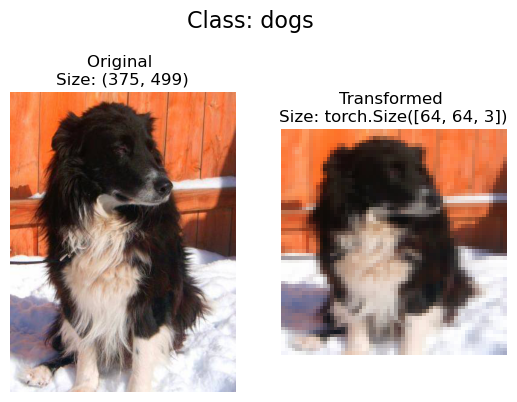

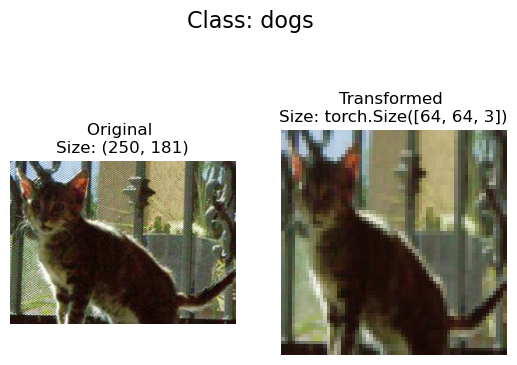

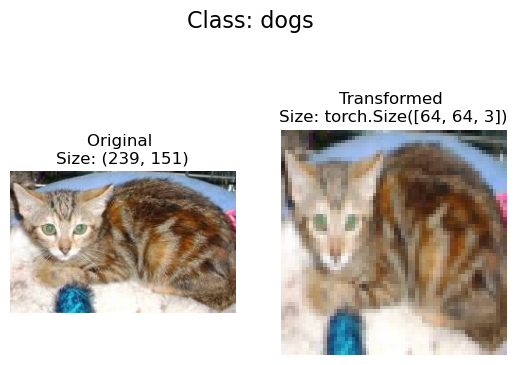

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transformer et tracer l'image
            # Note : permute() changera la forme de l'image pour l'adapter à matplotlib
            # (la valeur par défaut de PyTorch est [C, H, W] mais celle de Matplotlib est [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

# Chargement des données d'une image
Jusqu'à présent, nous avons créé une fonction de transformation de données. Nous sommes prêts à charger notre jeu de données à l'aide de cette fonction. La façon la plus simple de charger des données est d'utiliser la fonction `ImageFolder` de PyTorch. Chargeons le jeu de données avec cette fonction.

In [ ]:
from torchvision import datasets

# Création d'un ensemble d'entraînement
train_data = datasets.ImageFolder(root=train_dir, # dossier cible des images
                                  transform=data_transform, # Transformations à effectuer sur les données (images)
                                  target_transform=None) # Transformations à effectuer sur les étiquettes (si nécessaire)
#Création d'une série de tests
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 8005
    Root location: cat-and-dog/training_set/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2023
    Root location: cat-and-dog/test_set/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


Découvrons maintenant l'ensemble de données à l'aide des attributs comme indiqué ci-dessous.

In [ ]:
# Obtenir les noms des classes sous forme de liste
class_names = train_data.classes
print("Class names: ",class_names)
# Peut également obtenir les noms de classe sous forme de dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Vérifiez les longueurs
print("Longueur des ensembles d'apprentissage et de test: ", len(train_data), len(test_data))

Class names:  ['cats', 'dogs']
Class names as a dict:  {'cats': 0, 'dogs': 1}
Longueur des ensembles d'apprentissage et de test:  8005 2023


## Transformer les images chargées en images DataLoader

Jusqu'à présent, nous avons chargé des images. Notez qu'un `DataLoader` dans PyTorch est un utilitaire utilisé pour charger des données à partir d'un objet dataset en parallèle. Il permet à l'utilisateur de charger des données par lots, ce qui peut être utile pour la formation des modèles d'apprentissage profond, car cela permet au modèle de traiter plusieurs échantillons à la fois, ce qui peut accélérer le processus de formation. En outre, il permet également à l'utilisateur de mélanger les données, ce qui peut aider à prévenir le surajustement.

Le DataLoader prend un objet dataset et plusieurs autres paramètres optionnels, tels que la taille du lot, le nombre de threads de travail à utiliser pour charger les données et un drapeau booléen indiquant s'il faut ou non mélanger les données. Le DataLoader renvoie alors un itérateur qui peut être utilisé pour parcourir les données par lots.


In [ ]:
# Transformez les ensembles de données d'entraînement et de test en DataLoaders

bs=256
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=bs,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=bs,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1fe286fb990>,
 <torch.utils.data.dataloader.DataLoader at 0x1fe28436d90>)

In [ ]:
# Définir le modèle MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(64 * 64 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 2)  # Taille de sortie 2 pour deux classes : chat et chien


    def forward(self, x,return_features=False):
        x = x.view(x.size(0), -1)  # Aplatir l'entrée 64 x 64 x 3
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))

        if return_features:
          return x
        else:
          x = self.fc5(x)
          return x

In [ ]:
# Initialiser le modèle, la fonction de perte et l'optimiseur
model = MLP().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Former le modèle
train_loss=[]
test_accuracy=[]
best_accuracy=-np.inf
num_epochs = 20
for epoch in range(num_epochs):

    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
    train_loss.append(running_loss/(i+1))
    # Tester le modèle
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, labels = data
            inputs, labels=inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    test_accuracy.append(accuracy)
    print('Précision du réseau a lepoch %d sur les images tests:'%(epoch) ,100 * accuracy)
    if accuracy > best_accuracy:
      best_accuracy=accuracy
      torch.save(model.state_dict(), 'mlp.pth')



print('Formation terminée')

Précision du réseau a lepoch 0 sur les images tests: 49.925852694018786
Précision du réseau a lepoch 1 sur les images tests: 54.47355412753336
Précision du réseau a lepoch 2 sur les images tests: 58.47750865051903
Précision du réseau a lepoch 3 sur les images tests: 57.98319327731093
Précision du réseau a lepoch 4 sur les images tests: 61.295106277805246
Précision du réseau a lepoch 5 sur les images tests: 60.603064755313895
Précision du réseau a lepoch 6 sur les images tests: 62.38260009886307
Précision du réseau a lepoch 7 sur les images tests: 60.800790904597136
Précision du réseau a lepoch 8 sur les images tests: 61.245674740484425
Précision du réseau a lepoch 9 sur les images tests: 62.333168561542266
Précision du réseau a lepoch 10 sur les images tests: 61.78942165101334
Précision du réseau a lepoch 11 sur les images tests: 62.5308947108255
Précision du réseau a lepoch 12 sur les images tests: 62.5308947108255
Précision du réseau a lepoch 13 sur les images tests: 61.4434008897676

KeyboardInterrupt: 

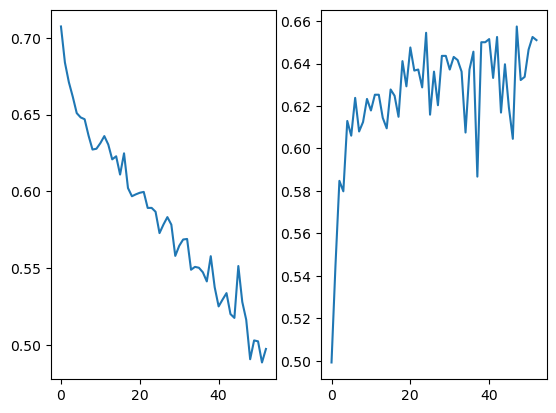

In [ ]:
plt.subplot(121)
plt.plot(train_loss)
plt.subplot(122)
plt.plot(test_accuracy)

In [ ]:
#torch.save(model.state_dict(), 'mlp.pth')

In [ ]:
model.load_state_dict(torch.load('mlp.pth'))

<All keys matched successfully>

In [ ]:


# Tester le modèle
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        inputs, labels=inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Précision du réseau sur les images tests: {100 * accuracy:.2f}%')

Précision du réseau sur les images tests: 65.74%


#Tracer les vecteurs de caractéristiques à l'aide de TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
last_layer_output = []
labels = []
with torch.no_grad():
        for data in test_dataloader:
            inputs, target = data
            inputs, labels=inputs.cuda(), labels.cuda()
            outputs = model(inputs,return_features=True)
            last_layer_output.extend(outputs.detach().cpu().numpy())
            labels.extend(target.detach().cpu().numpy())

In [ ]:
last_layer_output=np.array(last_layer_output)
labels =np.array(labels )

In [ ]:
tsne = TSNE(n_components=2)
output_2d = tsne.fit_transform(last_layer_output)

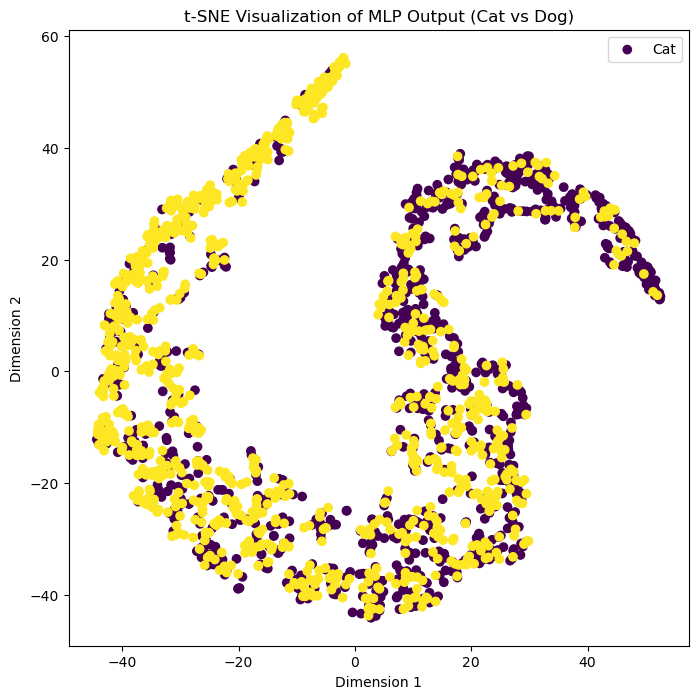

In [ ]:
# Visualize the 2D representation of the validation set
plt.figure(figsize=(8, 8))
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=labels)

plt.title('t-SNE Visualization of MLP Output (Cat vs Dog)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(['Cat', 'Dog'])
plt.show()